<a href="https://colab.research.google.com/github/Ayan1311819/Machine_Learning/blob/main/CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [2]:
import numpy as np
import pandas as pd

In [3]:
!pip install kaggle



In [6]:
!kaggle datasets download -d nafishamoin/bangladeshi-crops-disease-dataset -p /kaggle/working1 #Downloading dataset from kaggle



Dataset URL: https://www.kaggle.com/datasets/nafishamoin/bangladeshi-crops-disease-dataset
License(s): copyright-authors
100% 6.43G/6.45G [00:36<00:00, 248MB/s]
100% 6.45G/6.45G [00:36<00:00, 187MB/s]


In [7]:
ls /kaggle/working1/

bangladeshi-crops-disease-dataset.zip


In [8]:
import zipfile
# Extracting Zip files
zip_path = "/kaggle/working1/bangladeshi-crops-disease-dataset.zip"
extract_path = "/kaggle/working/Dataset/"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [9]:
ls /kaggle/working/Dataset/CropDisease/Crop___DIsease/

Corn___Common_Rust/     Invalid/                Rice___Brown_Spot/  Wheat___Brown_Rust/
Corn___Gray_Leaf_Spot/  Potato___Early_Blight/  Rice___Healthy/     Wheat___Healthy/
Corn___Healthy/         Potato___Healthy/       Rice___Hispa/       Wheat___Yellow_Rust/
Corn___Leaf_Blight/     Potato___Late_Blight/   Rice___Leaf_Blast/


In [10]:
!mkdir -p /kaggle/working/Dataset

In [11]:
!cp -a /kaggle/working/Dataset/CropDisease/Crop___DIsease/. /kaggle/working/Dataset
!rm -r /kaggle/working/Dataset/Invalid

In [12]:
!mv '/kaggle/working/Dataset/Rice___Brown_Spot' '/kaggle/working/Dataset/Rice: Brown Spot'
!mv '/kaggle/working/Dataset/Corn___Gray_Leaf_Spot' '/kaggle/working/Dataset/Corn: Gray Leaf Spot'
!mv '/kaggle/working/Dataset/Rice___Leaf_Blast' '/kaggle/working/Dataset/Rice: Leaf Blast'
!mv '/kaggle/working/Dataset/Corn___Leaf_Blight' '/kaggle/working/Dataset/Corn: Leaf Blight'
!mv '/kaggle/working/Dataset/Potato___Early_Blight' '/kaggle/working/Dataset/Potato: Early Blight'
!mv '/kaggle/working/Dataset/Potato___Healthy' '/kaggle/working/Dataset/Potato: Healthy'
!mv '/kaggle/working/Dataset/Rice___Healthy' '/kaggle/working/Dataset/Rice: Healthy'
!mv '/kaggle/working/Dataset/Wheat___Brown_Rust' '/kaggle/working/Dataset/Wheat: Brown Rust'
!mv '/kaggle/working/Dataset/Potato___Late_Blight' '/kaggle/working/Dataset/Potato: Late Blight'
!mv '/kaggle/working/Dataset/Wheat___Healthy' '/kaggle/working/Dataset/Wheat: Healthy'
!mv '/kaggle/working/Dataset/Wheat___Yellow_Rust' '/kaggle/working/Dataset/Wheat: Yellow Rust'
!mv '/kaggle/working/Dataset/Corn___Healthy' '/kaggle/working/Dataset/Corn: Healthy'
!mv '/kaggle/working/Dataset/Corn___Common_Rust' '/kaggle/working/Dataset/Corn: Common Rust'
!mv '/kaggle/working/Dataset/Rice___Hispa' '/kaggle/working/Dataset/Rice: Hispa'

In [15]:
CLASS_NAMES = []
if len(CLASS_NAMES) == 0:
    for directory in sorted(os.listdir('/kaggle/working/Dataset/')):
        CLASS_NAMES.append(directory)
NUM_CLASSES = len(CLASS_NAMES)
NUM_CLASSES, CLASS_NAMES


(14,
 ['Corn: Common Rust',
  'Corn: Gray Leaf Spot',
  'Corn: Healthy',
  'Corn: Leaf Blight',
  'Potato: Early Blight',
  'Potato: Healthy',
  'Potato: Late Blight',
  'Rice: Brown Spot',
  'Rice: Healthy',
  'Rice: Hispa',
  'Rice: Leaf Blast',
  'Wheat: Brown Rust',
  'Wheat: Healthy',
  'Wheat: Yellow Rust'])

In [14]:
# prompt: drop the label in above cell 'CropDisease'

!rm -r /kaggle/working/Dataset/CropDisease


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


In [17]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [19]:
#Defining model architechure
#Alexnet
with tf.device('/GPU:0'):
  model = tf.keras.models.Sequential([
    #1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #Passing it to a Fully Connected layer
    tf.keras.layers.Flatten(),
    # 1st Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    # 2nd Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    # 3rd Fully Connected Layer
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    #Output Layer
    tf.keras.layers.Dense(14, activation='softmax'),
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Loss fucntion and optimization procedure
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 55, 55, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 13, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 62,414,246 (238.09 MB)

 Trainable params: 62,403,302 (238.05 MB)

 Non-trainable params: 10,944 (42.75 KB)

In [22]:
#hyperparameters
epochs = 44
batch_size = 32
image_height = 227
image_width = 227

In [ ]:
#Creating an object of ImageDataGenerator for augmenting training dataset
# train_datagen = ImageDataGenerator(rescale= 1./255,
# rotation_range=10,
# width_shift_range=0.1,
# height_shift_range=0.1,
# shear_range=0.1,
# zoom_range=0.1,
# horizontal_flip=True,
# fill_mode='nearest')

# test_datagen = ImageDataGenerator(rescale= 1./255)

In [23]:
train_dir = '/kaggle/working/Dataset/'
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create generators for training and validation
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical',
    color_mode = "rgb",
    subset='training'  # Set as training data
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    color_mode= "rgb",
    subset='validation'
)


Found 23599 images belonging to 14 classes.
Found 5891 images belonging to 14 classes.


In [24]:
# train_datagen and test_datagen for alexnet
# Get sample numbers for fit and validation
nb_train_samples = train_generator.samples
nb_test_samples = validation_generator.samples
classes = list(train_generator.class_indices.keys())
print(len(classes))

14


In [26]:
history = model.fit(train_generator, epochs=16, validation_data=validation_generator)

Epoch 1/16


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


738/738 ━━━━━━━━━━━━━━━━━━━━ 288s 373ms/step - accuracy: 0.6063 - loss: 1.8274 - val_accuracy: 0.4273 - val_loss: 4.0488
Epoch 2/16
738/738 ━━━━━━━━━━━━━━━━━━━━ 304s 361ms/step - accuracy: 0.7821 - loss: 0.6897 - val_accuracy: 0.4154 - val_loss: 2.9465
Epoch 3/16
738/738 ━━━━━━━━━━━━━━━━━━━━ 318s 355ms/step - accuracy: 0.7914 - loss: 0.7403 - val_accuracy: 0.5225 - val_loss: 5.6159
Epoch 4/16
738/738 ━━━━━━━━━━━━━━━━━━━━ 262s 353ms/step - accuracy: 0.8006 - loss: 0.7370 - val_accuracy: 0.6091 - val_loss: 1.2512
Epoch 5/16
738/738 ━━━━━━━━━━━━━━━━━━━━ 267s 360ms/step - accuracy: 0.8193 - loss: 0.5969 - val_accuracy: 0.8221 - val_loss: 1.0196
Epoch 6/16
738/738 ━━━━━━━━━━━━━━━━━━━━ 324s 361ms/step - accuracy: 0.8781 - loss: 0.3532 - val_accuracy: 0.6899 - val_loss: 4.3685
Epoch 7/16
738/738 ━━━━━━━━━━━━━━━━━━━━ 293s 395ms/step - accuracy: 0.8857 - loss: 0.3562 - val_accuracy: 0.7994 - val_loss: 0.7038
Epoch 8/16
738/738 ━━━━━━━━━━━━━━━━━━━━ 264s 357ms/step - accuracy: 0.8802 - loss: 0.35

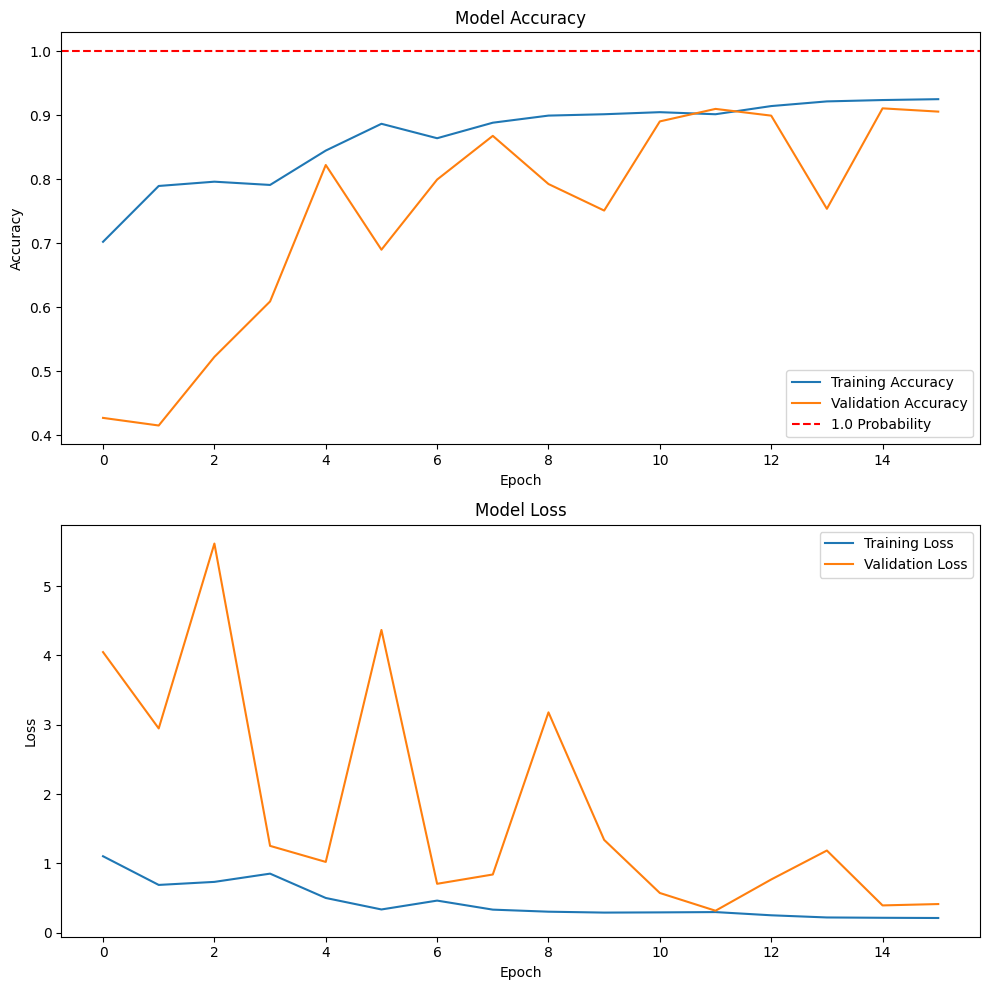

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
# Plotting the model accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=1, color='r', linestyle='--', label='1.0 Probability')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the model loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
#train accuracy is less than val maybe because of rotations or dropouts!

In [ ]:
#CONFUSION MATRIX

#LOAD AND PREDICTION --  STREAMLIT

In [40]:
#SAVE COMPLETE MODEL ARCHITECHURE
model.save('my_model.h5')
#SAVE MODEL PARAMETERS
model.save_weights('myweigh.weights.h5')

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
# Define the path where you want to save the model
save_path = '/content/drive/My Drive/my_model.h5'
# Save your model
model.save(save_path)

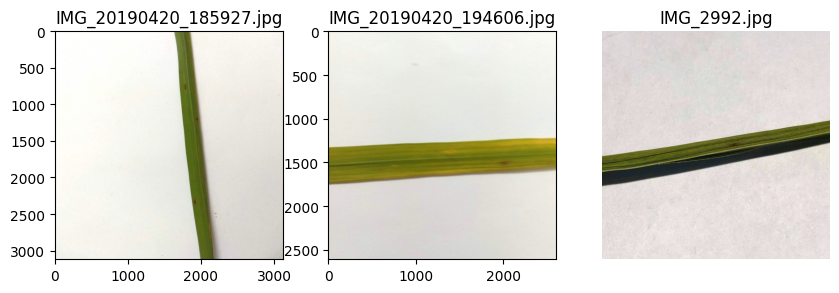

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread('/kaggle/working/Dataset/Rice: Brown Spot/IMG_20190420_185927.jpg')
img2 = mpimg.imread('/kaggle/working/Dataset/Rice: Brown Spot/IMG_20190420_194606.jpg')
img3 = mpimg.imread('/kaggle/working/Dataset/Rice: Brown Spot/IMG_2992.jpg')

plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('IMG_20190420_185927.jpg')

plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.title('IMG_20190420_194606.jpg')

plt.subplot(1, 3, 3)
plt.imshow(img3)
plt.title('IMG_2992.jpg')
plt.axis('off')
plt.show()
